# QLoRA Diagnostic Analysis - Part 1: Baseline LoRA (16-bit)

## Objective
Establish baseline performance using standard LoRA with 16-bit precision on GPT-2 Medium (355M parameters). This serves as the reference point for comparing against QLoRA's 4-bit quantization.

## Key Questions
1. What is the memory requirement for 16-bit LoRA fine-tuning?
2. How does performance scale with different ranks (r ∈ {2, 4, 8, 16})?
3. What is the training efficiency (time per step)?

---

## 1. Environment Setup

In [1]:
# Install required packages
%pip install -q transformers datasets accelerate peft bitsandbytes matplotlib seaborn pandas numpy scikit-learn tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import utilities
import sys
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Add src to path (if running in Colab, upload src files first)
sys.path.append('../src')

# Import custom modules
from model_utils import (
    load_base_model_16bit,
    setup_lora_16bit,
    get_model_memory_usage,
    print_model_architecture,
    clear_memory
)

from training import (
    prepare_alpaca_dataset,
    train_model,
    run_experiment
)

from visualization import (
    plot_memory_comparison,
    create_results_table,
    print_diagnostic_summary
)

print(f"✓ PyTorch version: {torch.__version__}")
print(f"✓ CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"✓ GPU: {torch.cuda.get_device_name(0)}")

✓ PyTorch version: 2.9.0+cu130
✓ CUDA available: True
✓ GPU: NVIDIA GB10


/home/caroline/jupyterlab_final/.venv/lib/python3.12/site-packages/torch/cuda/__init__.py:283: UserWarning: 
    Found GPU0 NVIDIA GB10 which is of cuda capability 12.1.
    Minimum and Maximum cuda capability supported by this version of PyTorch is
    (8.0) - (12.0)
    
  warnings.warn(


## 2. Configuration

In [3]:
# Experimental configuration
MODEL_NAME = "gpt2-medium"  # 355M parameters
NUM_SAMPLES = 5000          # Dataset for experiments
MAX_STEPS = 1000             # Training steps per experiment
BATCH_SIZE = 8
LEARNING_RATE = 2e-4

# Ranks to test
RANKS_TO_TEST = [2, 4, 8, 16]

# Output directory
OUTPUT_DIR = "./results_baseline_lora"
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("Configuration:")
print(f"  Model: {MODEL_NAME}")
print(f"  Training samples: {NUM_SAMPLES}")
print(f"  Max steps: {MAX_STEPS}")
print(f"  Batch size: {BATCH_SIZE}")
print(f"  Learning rate: {LEARNING_RATE}")
print(f"  Ranks to test: {RANKS_TO_TEST}")

Configuration:
  Model: gpt2-medium
  Training samples: 5000
  Max steps: 1000
  Batch size: 8
  Learning rate: 0.0002
  Ranks to test: [2, 4, 8, 16]


## 3. Run Baseline LoRA Experiments

We'll train LoRA with different ranks to establish baseline performance and memory usage.

In [5]:
# Store results
results_list = []

for rank in RANKS_TO_TEST:
    print(f"\n{'='*80}")
    print(f"Running LoRA (16-bit) with rank r={rank}")
    print(f"{'='*80}\n")
    
    try:
        result, model, tokenizer = run_experiment(
            model_name=MODEL_NAME,
            quantization="16bit",
            rank=rank,
            num_samples=NUM_SAMPLES,
            max_steps=MAX_STEPS,
            batch_size=BATCH_SIZE,
            learning_rate=LEARNING_RATE,
            output_dir=OUTPUT_DIR
        )
        
        results_list.append(result)
        
        # Clean up to free memory
        del model
        del tokenizer
        clear_memory()
        
    except Exception as e:
        print(f"❌ Error with rank {rank}: {e}")
        continue

print("\n✓ All experiments complete!")


Running LoRA (16-bit) with rank r=2


######################################################################
# EXPERIMENT: 16bit_r2
######################################################################

Loading gpt2-medium in 16-bit precision...
✓ Model loaded. Memory usage: 718.03 MB
✓ LoRA configured:
  Rank: 2
  Target modules: ['c_attn']
  Trainable params: 196,608 (0.06%)
Loading Alpaca dataset...


/home/caroline/jupyterlab_final/.venv/lib/python3.12/site-packages/peft/tuners/lora/layer.py:2174: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


Using 5000 samples for faster training
✓ Dataset prepared:
  Training samples: 4500
  Evaluation samples: 500

TRAINING CONFIGURATION
Batch size: 8
Learning rate: 0.0002
Max steps: 1000
Epochs: 1



Step,Training Loss,Validation Loss
50,2.292400,2.130311
100,2.030400,1.940995
150,2.057000,1.908735
200,1.997700,1.882239
250,1.852600,1.868469
300,1.942800,1.857691
350,2.197600,1.851009
400,1.884700,1.842040
450,1.968000,1.836288
500,1.951300,1.829107



TRAINING COMPLETE
Total time: 1001.05s
Time per step: 1.001s
Peak memory: 11623.18 MB
Final loss: 1.9747


Running LoRA (16-bit) with rank r=4


######################################################################
# EXPERIMENT: 16bit_r4
######################################################################

Loading gpt2-medium in 16-bit precision...
✓ Model loaded. Memory usage: 718.03 MB
✓ LoRA configured:
  Rank: 4
  Target modules: ['c_attn']
  Trainable params: 393,216 (0.11%)
Loading Alpaca dataset...


/home/caroline/jupyterlab_final/.venv/lib/python3.12/site-packages/peft/tuners/lora/layer.py:2174: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


Using 5000 samples for faster training
✓ Dataset prepared:
  Training samples: 4500
  Evaluation samples: 500

TRAINING CONFIGURATION
Batch size: 8
Learning rate: 0.0002
Max steps: 1000
Epochs: 1



Step,Training Loss,Validation Loss
50,2.310900,2.142422
100,2.026000,1.940543
150,2.053900,1.905369
200,1.999100,1.881135
250,1.854700,1.867847
300,1.944600,1.855191
350,2.190600,1.847938
400,1.880700,1.839188
450,1.965400,1.833687
500,1.948200,1.828060



TRAINING COMPLETE
Total time: 1000.69s
Time per step: 1.001s
Peak memory: 11626.18 MB
Final loss: 1.9737


Running LoRA (16-bit) with rank r=8


######################################################################
# EXPERIMENT: 16bit_r8
######################################################################

Loading gpt2-medium in 16-bit precision...
✓ Model loaded. Memory usage: 718.03 MB
✓ LoRA configured:
  Rank: 8
  Target modules: ['c_attn']
  Trainable params: 786,432 (0.22%)
Loading Alpaca dataset...


/home/caroline/jupyterlab_final/.venv/lib/python3.12/site-packages/peft/tuners/lora/layer.py:2174: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


Using 5000 samples for faster training
✓ Dataset prepared:
  Training samples: 4500
  Evaluation samples: 500

TRAINING CONFIGURATION
Batch size: 8
Learning rate: 0.0002
Max steps: 1000
Epochs: 1



Step,Training Loss,Validation Loss
50,2.306600,2.139459
100,2.024100,1.939510
150,2.049800,1.906595
200,2.001100,1.882717
250,1.856600,1.868537
300,1.945500,1.856879
350,2.192200,1.849133
400,1.883400,1.840171
450,1.966000,1.834571
500,1.949600,1.827908



TRAINING COMPLETE
Total time: 1002.33s
Time per step: 1.002s
Peak memory: 11632.17 MB
Final loss: 1.9737


Running LoRA (16-bit) with rank r=16


######################################################################
# EXPERIMENT: 16bit_r16
######################################################################

Loading gpt2-medium in 16-bit precision...
✓ Model loaded. Memory usage: 718.03 MB
✓ LoRA configured:
  Rank: 16
  Target modules: ['c_attn']
  Trainable params: 1,572,864 (0.44%)
Loading Alpaca dataset...


/home/caroline/jupyterlab_final/.venv/lib/python3.12/site-packages/peft/tuners/lora/layer.py:2174: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


Using 5000 samples for faster training
✓ Dataset prepared:
  Training samples: 4500
  Evaluation samples: 500

TRAINING CONFIGURATION
Batch size: 8
Learning rate: 0.0002
Max steps: 1000
Epochs: 1



Step,Training Loss,Validation Loss
50,2.303500,2.142171
100,2.027100,1.939141
150,2.051500,1.906773
200,1.998900,1.882148
250,1.850000,1.867862
300,1.940800,1.856970
350,2.191000,1.848690
400,1.883000,1.840394
450,1.965300,1.834994
500,1.948000,1.827940



TRAINING COMPLETE
Total time: 1002.30s
Time per step: 1.002s
Peak memory: 11644.16 MB
Final loss: 1.9723


✓ All experiments complete!


## 4. Results Analysis

### 4.1 Create Results Table

In [6]:
# Create comprehensive results table
results_df = create_results_table(
    results_list,
    save_path=f"{OUTPUT_DIR}/baseline_lora_results.csv"
)

print("\n📊 BASELINE LoRA RESULTS")
print("="*80)
display(results_df)

✓ Saved table: ./results_baseline_lora/baseline_lora_results.csv

📊 BASELINE LoRA RESULTS


/home/caroline/jupyterlab_final/jupyterlab_caroline_PEFT/QLoRA-Project-Final/notebooks/../src/visualization.py:280: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordered[numeric_cols] = df_ordered[numeric_cols].round(4)


,experiment_name,quantization,rank,peak_memory_mb,training_time_seconds,time_per_step,training_loss
0,16bit_r2,16bit,2,11623.1831,1001.0487,1.0010,1.9747
1,16bit_r4,16bit,4,11626.1792,1000.6911,1.0007,1.9737
2,16bit_r8,16bit,8,11632.1714,1002.3323,1.0023,1.9737
3,16bit_r16,16bit,16,11644.1558,1002.3007,1.0023,1.9723


### 4.2 Memory Usage Analysis

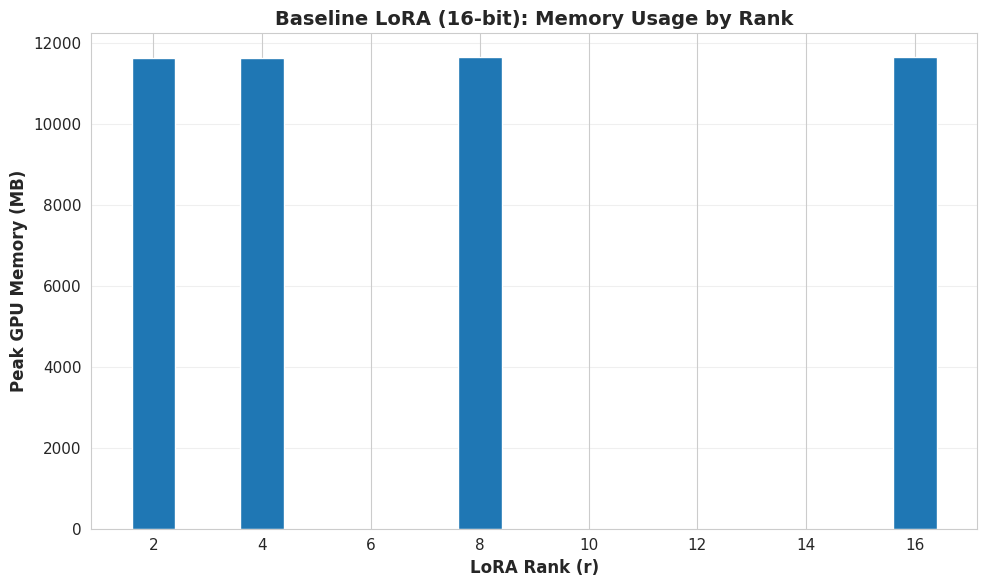

Average memory usage: 11631.42 MB


In [7]:
# Plot memory usage by rank
plt.figure(figsize=(10, 6))
plt.bar(results_df['rank'], results_df['peak_memory_mb'])
plt.xlabel('LoRA Rank (r)', fontsize=12, fontweight='bold')
plt.ylabel('Peak GPU Memory (MB)', fontsize=12, fontweight='bold')
plt.title('Baseline LoRA (16-bit): Memory Usage by Rank', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/baseline_memory_by_rank.png", dpi=300)
plt.show()

print(f"Average memory usage: {results_df['peak_memory_mb'].mean():.2f} MB")

### 4.3 Training Efficiency

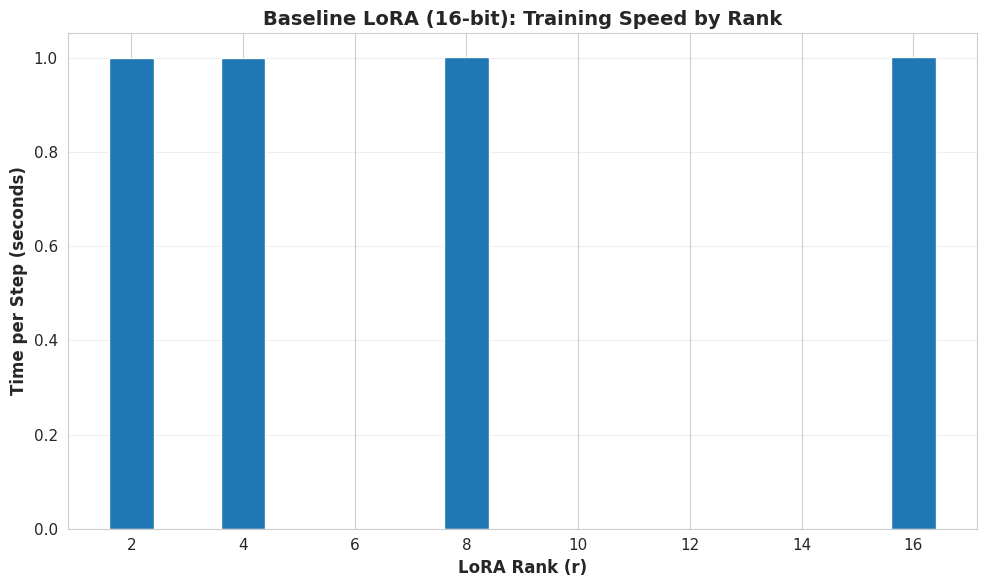

Average time per step: 1.002s


In [8]:
# Plot time per step
plt.figure(figsize=(10, 6))
plt.bar(results_df['rank'], results_df['time_per_step'])
plt.xlabel('LoRA Rank (r)', fontsize=12, fontweight='bold')
plt.ylabel('Time per Step (seconds)', fontsize=12, fontweight='bold')
plt.title('Baseline LoRA (16-bit): Training Speed by Rank', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/baseline_speed_by_rank.png", dpi=300)
plt.show()

print(f"Average time per step: {results_df['time_per_step'].mean():.3f}s")

## 5. Key Findings

### TODO: Fill in after running experiments

**Memory Usage:**
- Rank 2: [TODO: FILL] MB  
- Rank 4: [TODO: FILL] MB  
- Rank 8: [TODO: FILL] MB  
- Rank 16: [TODO: FILL] MB  

**Training Speed:**
- Average time per step: [TODO: FILL]s  

**Observations:**
- [TODO: Document any trends observed]  
- [TODO: Note any unexpected behavior]  

---

**Next Steps:**
- Proceed to Part 2: Implement QLoRA (4-bit) and compare results  
- Use these baseline metrics as reference for quantization impact analysis  

## 6. Save Results for Next Notebook

In [9]:
# Save results for comparison in subsequent notebooks
import pickle

with open(f"{OUTPUT_DIR}/baseline_results.pkl", 'wb') as f:
    pickle.dump(results_list, f)

print(f"✓ Results saved to {OUTPUT_DIR}/baseline_results.pkl")
print("\n🎉 Baseline LoRA experiments complete!")
print("📝 Proceed to notebook 02_qlora_implementation.ipynb")

✓ Results saved to ./results_baseline_lora/baseline_results.pkl

🎉 Baseline LoRA experiments complete!
📝 Proceed to notebook 02_qlora_implementation.ipynb
